In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud



In [ ]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
fake = pd.read_csv("/content/Fake.csv")
real = pd.read_csv("/content/True.csv")

print("Fake Shape:", fake.shape)
print("Real Shape:", real.shape)

Fake Shape: (23481, 4)
Real Shape: (21417, 4)


In [ ]:
fake["label"] = 0   # Fake news
real["label"] = 1   # Real news

In [ ]:
data = pd.concat([fake, real], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

print("Combined Dataset Shape:", data.shape)

Combined Dataset Shape: (44898, 5)


In [ ]:
data = data[["title", "text", "label"]]
data["content"] = data["title"] + " " + data["text"]

data.dropna(inplace=True)


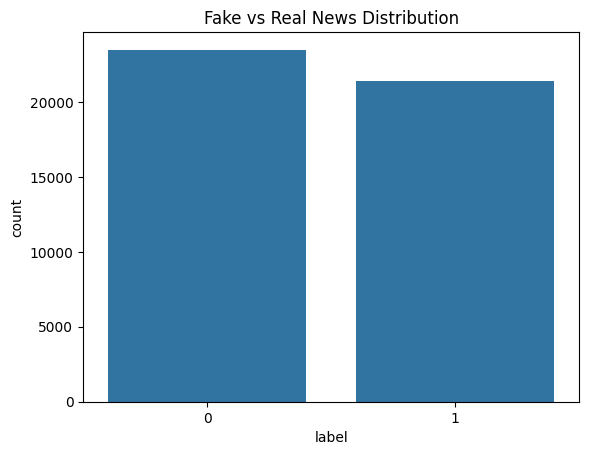

In [ ]:
sns.countplot(x=data["label"])
plt.title("Fake vs Real News Distribution")
plt.show()

In [ ]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

data["content"] = data["content"].apply(clean_text)

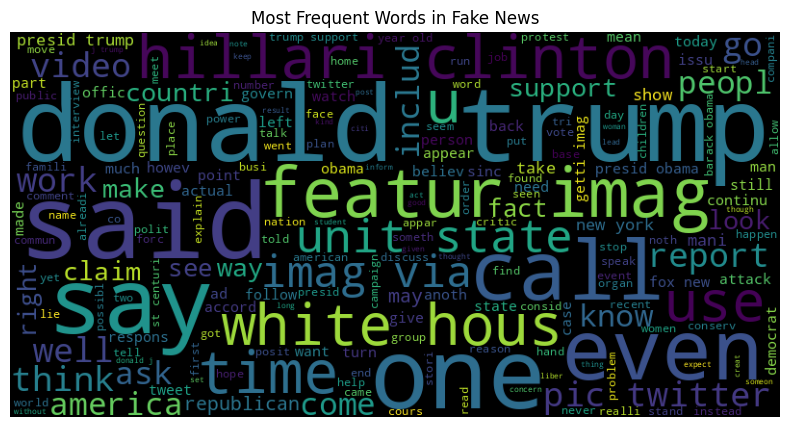

In [ ]:
fake_words = " ".join(data[data["label"]==0]["content"])

wordcloud = WordCloud(width=800, height=400).generate(fake_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Frequent Words in Fake News")
plt.show()

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(data["content"])
y = data["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [ ]:
def evaluate(name, y_true, y_pred):
    print("\n", "="*40)
    print("Model:", name)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate("Logistic Regression", y_test, lr_pred)
evaluate("Naive Bayes", y_test, nb_pred)
evaluate("SVM", y_test, svm_pred)


Model: Logistic Regression
Accuracy: 0.988641425389755
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4712
           1       0.98      0.99      0.99      4268

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Model: Naive Bayes
Accuracy: 0.9309576837416481
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4712
           1       0.93      0.92      0.93      4268

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


Model: SVM
Accuracy: 0.9951002227171493
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4712
           1       0.99      1.00      0.99      4268

    accuracy                        

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, svm_pred)
    ]
})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.988641
1          Naive Bayes  0.930958
2                  SVM  0.995100


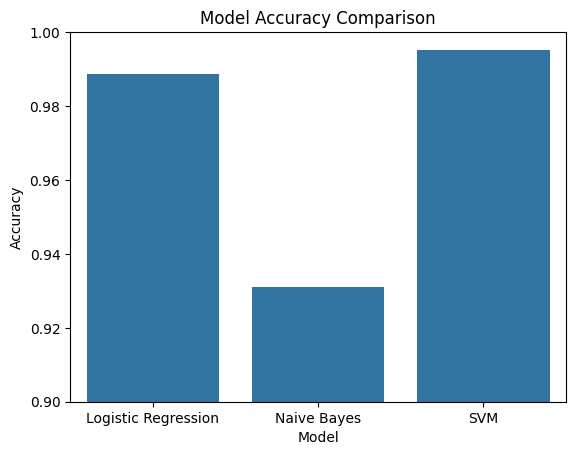

In [ ]:
sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("Model Accuracy Comparison")
plt.ylim(0.9,1.0)
plt.show()

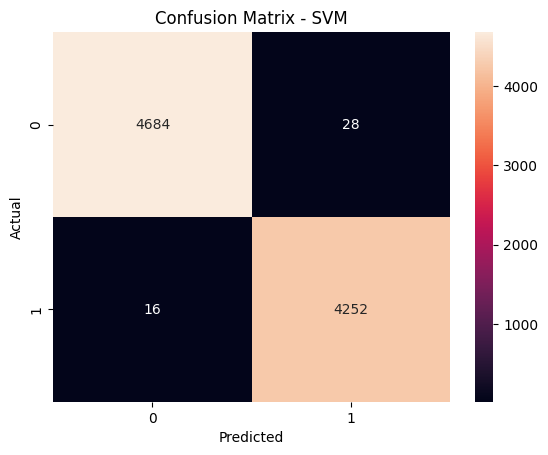

In [ ]:
cm = confusion_matrix(y_test, svm_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
feature_names = tfidf.get_feature_names_out()
coef = lr.coef_[0]

top_words = pd.DataFrame({
    "word": feature_names,
    "importance": coef
}).sort_values(by="importance", ascending=False)

print(top_words.head(10))


            word  importance
3742      reuter   24.793715
3853        said   16.246501
4837  washington    6.224369
4859   wednesday    5.306209
4613     tuesday    4.618156
4502    thursday    4.546917
1804      friday    4.256600
3032         nov    4.029549
3415  presidenti    3.881635
2867      monday    3.651360


In [ ]:
def predict_news(news):
    cleaned = clean_text(news)
    vector = tfidf.transform([cleaned])

    pred = svm.predict(vector)

    if pred[0] == 1:
        print("⚠️ Fake News")
    else:
        print("✅ Real News")

In [ ]:
news = input("Enter News Headline: ")
predict_news(news)

Enter News Headline: Government launches new education policy
✅ Real News
